<a href="https://colab.research.google.com/github/n1lays1ngh/Mental-Health-Predictor-App/blob/main/Mental_Health_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pycountry_convert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 16.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nilay31singh","key":"3429de464c7b256139da552fddb9f5be"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Mental Health Dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bhavikjikadara/mental-health-dataset",
  file_path,
  pandas_kwargs={"encoding": "ISO-8859-1"}
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-13-3666153887.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:          Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No 

In [4]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(292364, 17)

In [80]:
df['self_employed'].value_counts(dropna=False)


,count
self_employed,
No,257994
Yes,29168
NaN,5202


In [ ]:
df['Days_Indoors'].value_counts()

,count
Days_Indoors,
1-14 days,63548
31-60 days,60705
Go out Every day,58366
More than 2 months,55916
15-30 days,53829


In [14]:
df['self_employed'] = df['self_employed'].fillna('Missing')

In [ ]:
df.head()


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,Missing,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            292364 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [15]:
df_univ = df.copy().drop('Timestamp',axis = 1)

In [23]:
df_univ.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,Missing,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


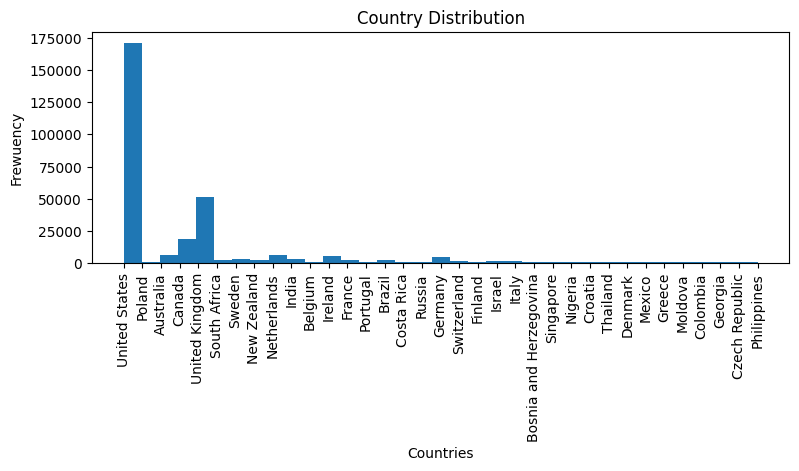

In [83]:
plt.figure(figsize =
 (9,3))
plt.hist(df_univ['Country'],bins  = 35)
plt.title("Country Distribution")
plt.xlabel('Countries')
plt.ylabel('Frewuency')
plt.xticks(rotation =90)
plt.show()

In [ ]:
df['Country'].value_counts()

,count
Country,
United States,171308
United Kingdom,51404
Canada,18726
Australia,6026
Netherlands,5894
Ireland,5548
Germany,4680
Sweden,2818
India,2774


In [16]:
import pycountry_convert as pc

def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

df_univ['Continent'] = df_univ['Country'].apply(country_to_continent)
df_univ.drop(columns=['Country'], inplace=True)

In [25]:
df_univ.head()

,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Continent
0,Female,Corporate,Missing,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,North America
1,Female,Corporate,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,North America
2,Female,Corporate,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,North America
3,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,North America
4,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,North America


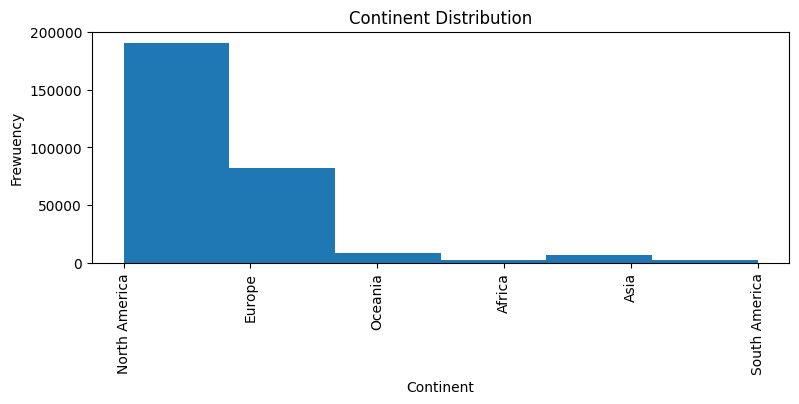

In [ ]:
plt.figure(figsize = (9,3))
plt.hist(df_univ['Continent'],bins  = 6)
plt.title("Continent Distribution")
plt.xlabel('Continent')
plt.ylabel('Frewuency')
plt.xticks(rotation =90)
plt.show()

In [ ]:


df_univ['Continent'].value_counts()

,count
Continent,
North America,190814
Europe,82132
Oceania,8020
Asia,6284
South America,2730
Africa,2384


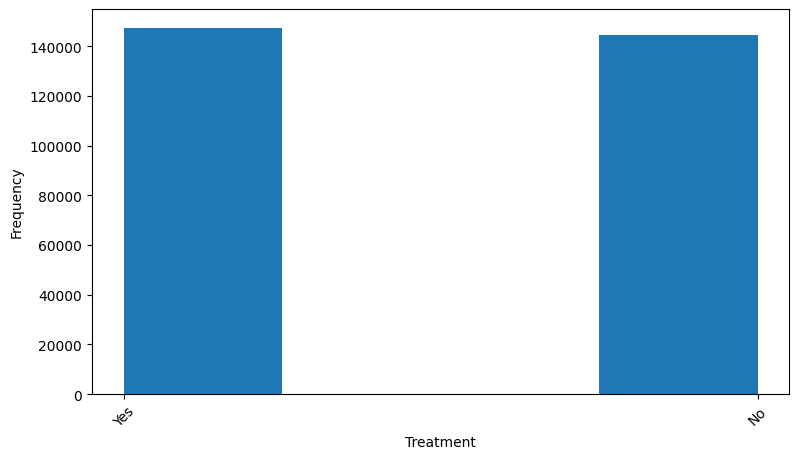

In [ ]:
plt.figure(figsize = (9,5))
plt.hist(df_univ['treatment'],bins = 4)
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

plt.show()


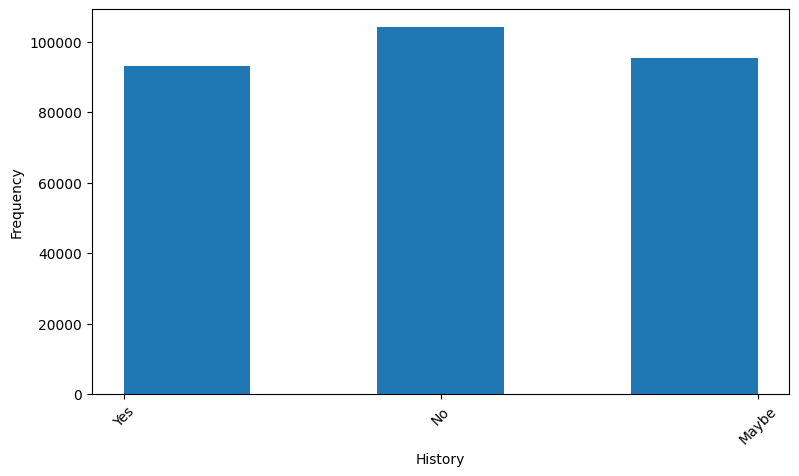

In [ ]:
plt.figure(figsize = (9,5))
plt.hist(df_univ['Mental_Health_History'],bins = 5)
plt.xlabel('History')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

plt.show()

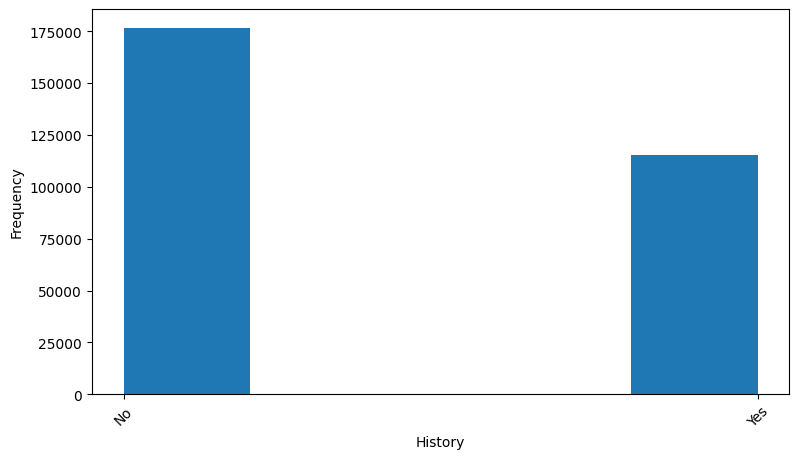

In [ ]:
plt.figure(figsize = (9,5))
plt.hist(df_univ['family_history'],bins = 5)
plt.xlabel('History')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

plt.show()

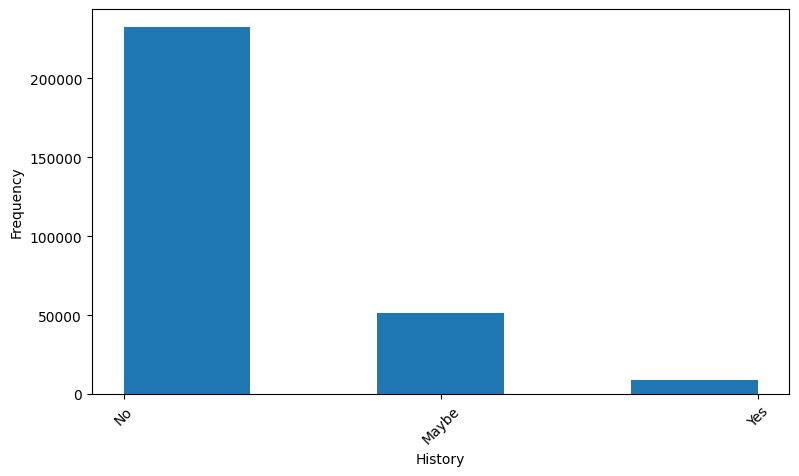

In [ ]:
plt.figure(figsize = (9,5))
plt.hist(df_univ['mental_health_interview'],bins = 5)
plt.xlabel('History')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

plt.show()

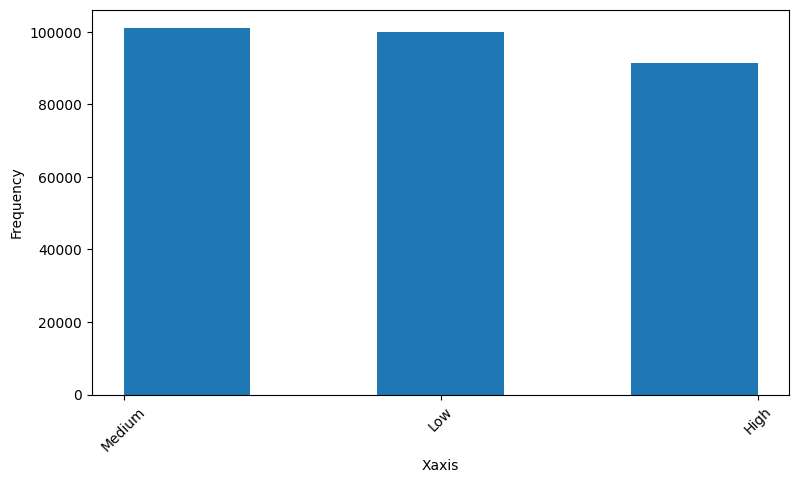

In [ ]:
plt.figure(figsize = (9,5))
plt.hist(df_univ['Mood_Swings'],bins = 5)
plt.xlabel('Xaxis')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

plt.show()

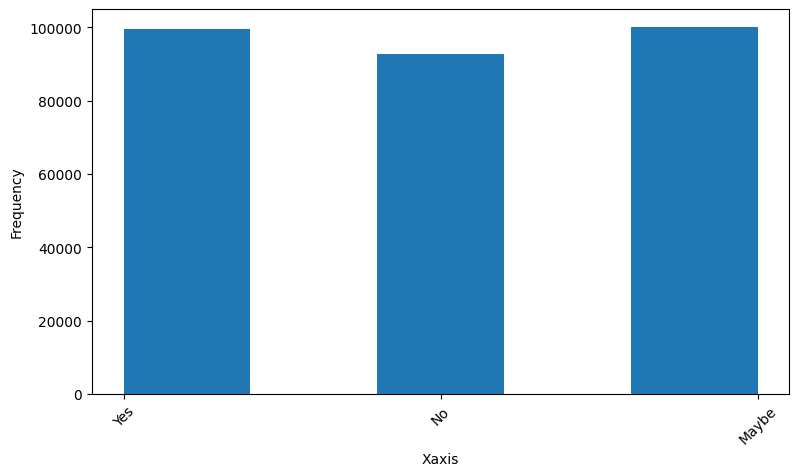

In [ ]:
plt.figure(figsize = (9,5))
plt.hist(df_univ['Growing_Stress'],bins = 5)
plt.xlabel('Xaxis')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

plt.show()

In [17]:
professional_roles = ['Business', 'Corporate']

# Map to 'Professional' or 'Non-Professional'
df_univ['Occupation_Category'] = df_univ['Occupation'].apply(
    lambda x: 'Professional' if x in professional_roles else 'Non-Professional'
)

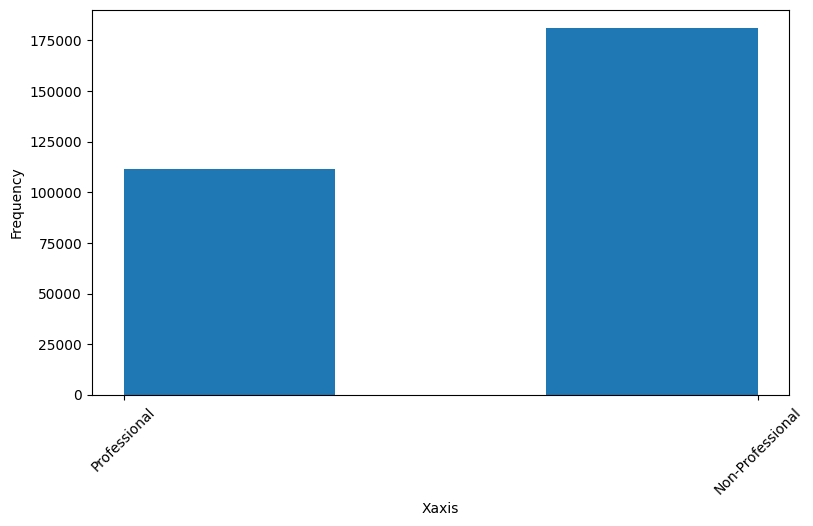

In [27]:
plt.figure(figsize = (9,5))
plt.hist(df_univ['Occupation_Category'],bins = 3)
plt.xlabel('Xaxis')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

plt.show()

In [ ]:
df_univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   292364 non-null  object
 1   Occupation               292364 non-null  object
 2   self_employed            292364 non-null  object
 3   family_history           292364 non-null  object
 4   treatment                292364 non-null  object
 5   Days_Indoors             292364 non-null  object
 6   Growing_Stress           292364 non-null  object
 7   Changes_Habits           292364 non-null  object
 8   Mental_Health_History    292364 non-null  object
 9   Mood_Swings              292364 non-null  object
 10  Coping_Struggles         292364 non-null  object
 11  Work_Interest            292364 non-null  object
 12  Social_Weakness          292364 non-null  object
 13  mental_health_interview  292364 non-null  object
 14  care_options        

In [20]:

df_univ.head()

,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Continent,Occupation_Category
0,Female,Missing,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,North America,Professional
1,Female,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,North America,Professional
2,Female,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,North America,Professional
3,Female,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,North America,Professional
4,Female,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,North America,Professional


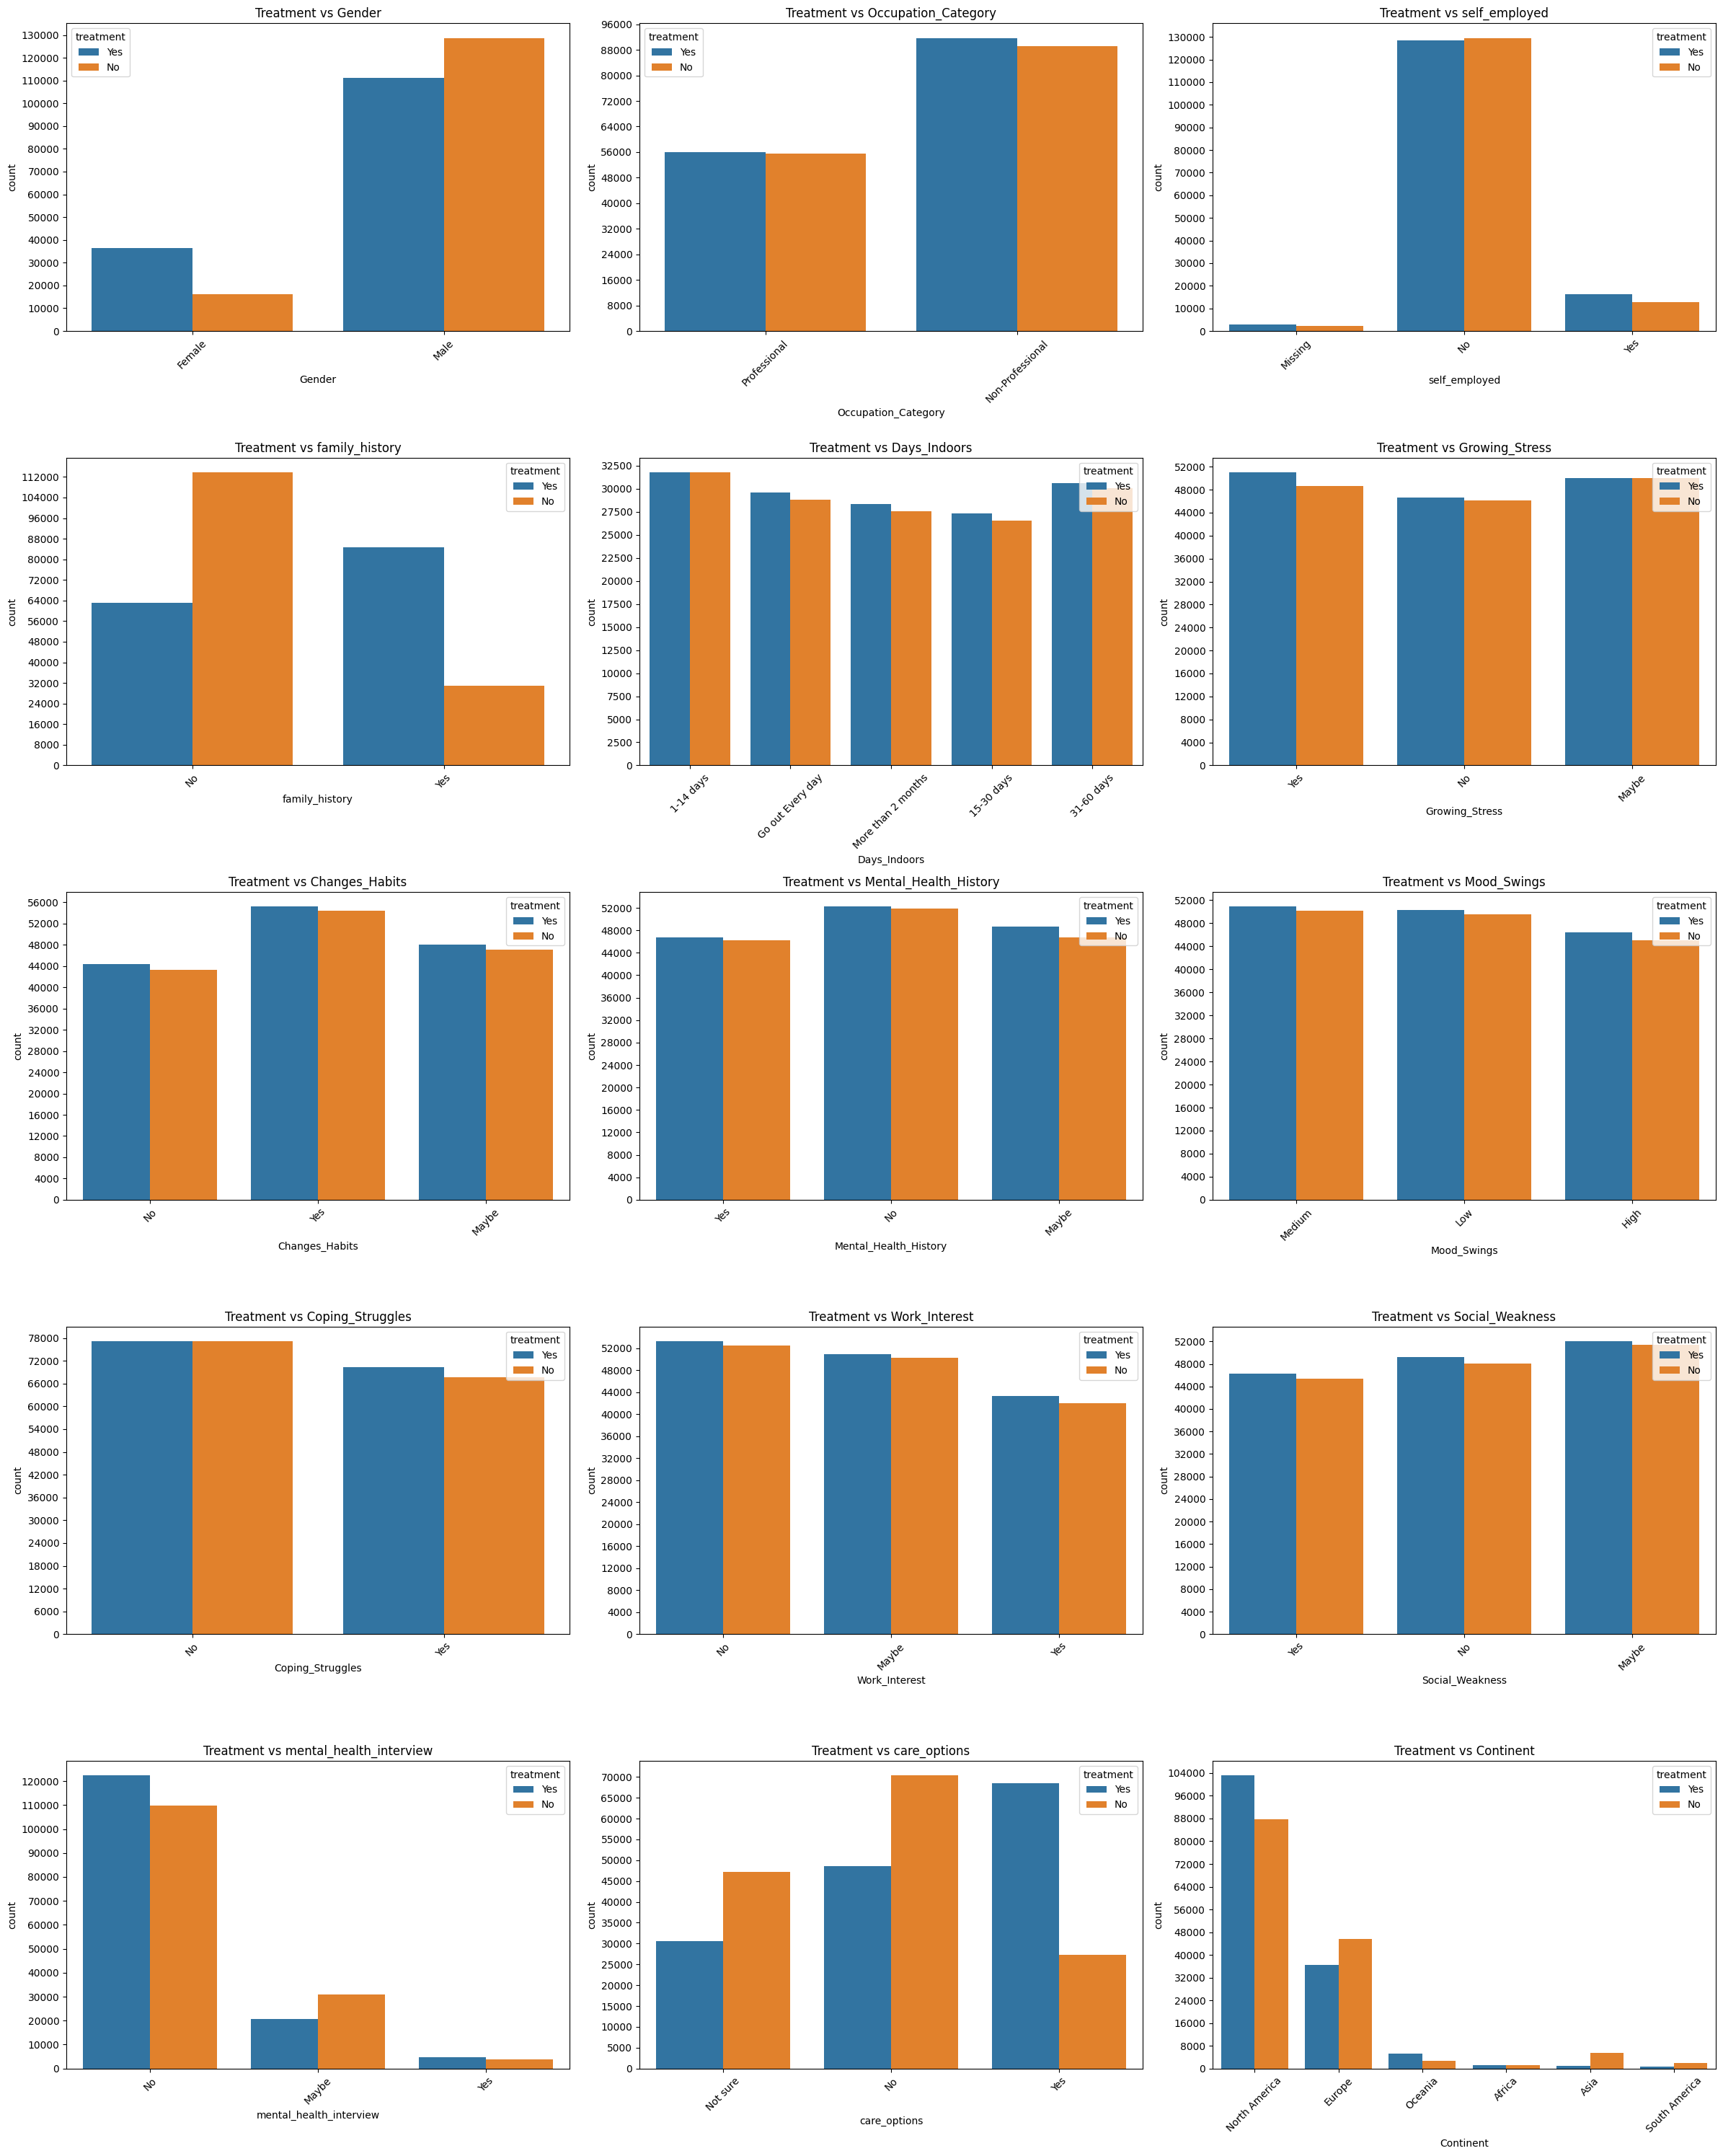

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

cat_cols = ['Gender', 'Occupation_Category', 'self_employed', 'family_history', 'Days_Indoors',
            'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
            'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
            'mental_health_interview', 'care_options', 'Continent']

plt.figure(figsize=(24, 30))

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(5, 3, i)
    sns.countplot(data=df_univ, x=col, hue='treatment', ax=ax)
    ax.set_title(f'Treatment vs {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Make Y-axis more detailed
    ax.yaxis.set_major_locator(MaxNLocator(nbins=15))  # Try 10 Y ticks

plt.tight_layout()
plt.show()


/tmp/ipython-input-12-2276373687.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_univ, x=col, ax=ax, palette="Set3")
/tmp/ipython-input-12-2276373687.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-12-2276373687.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_univ, x=col, ax=ax, palette="Set3")
/tmp/ipython-input-12-2276373687.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

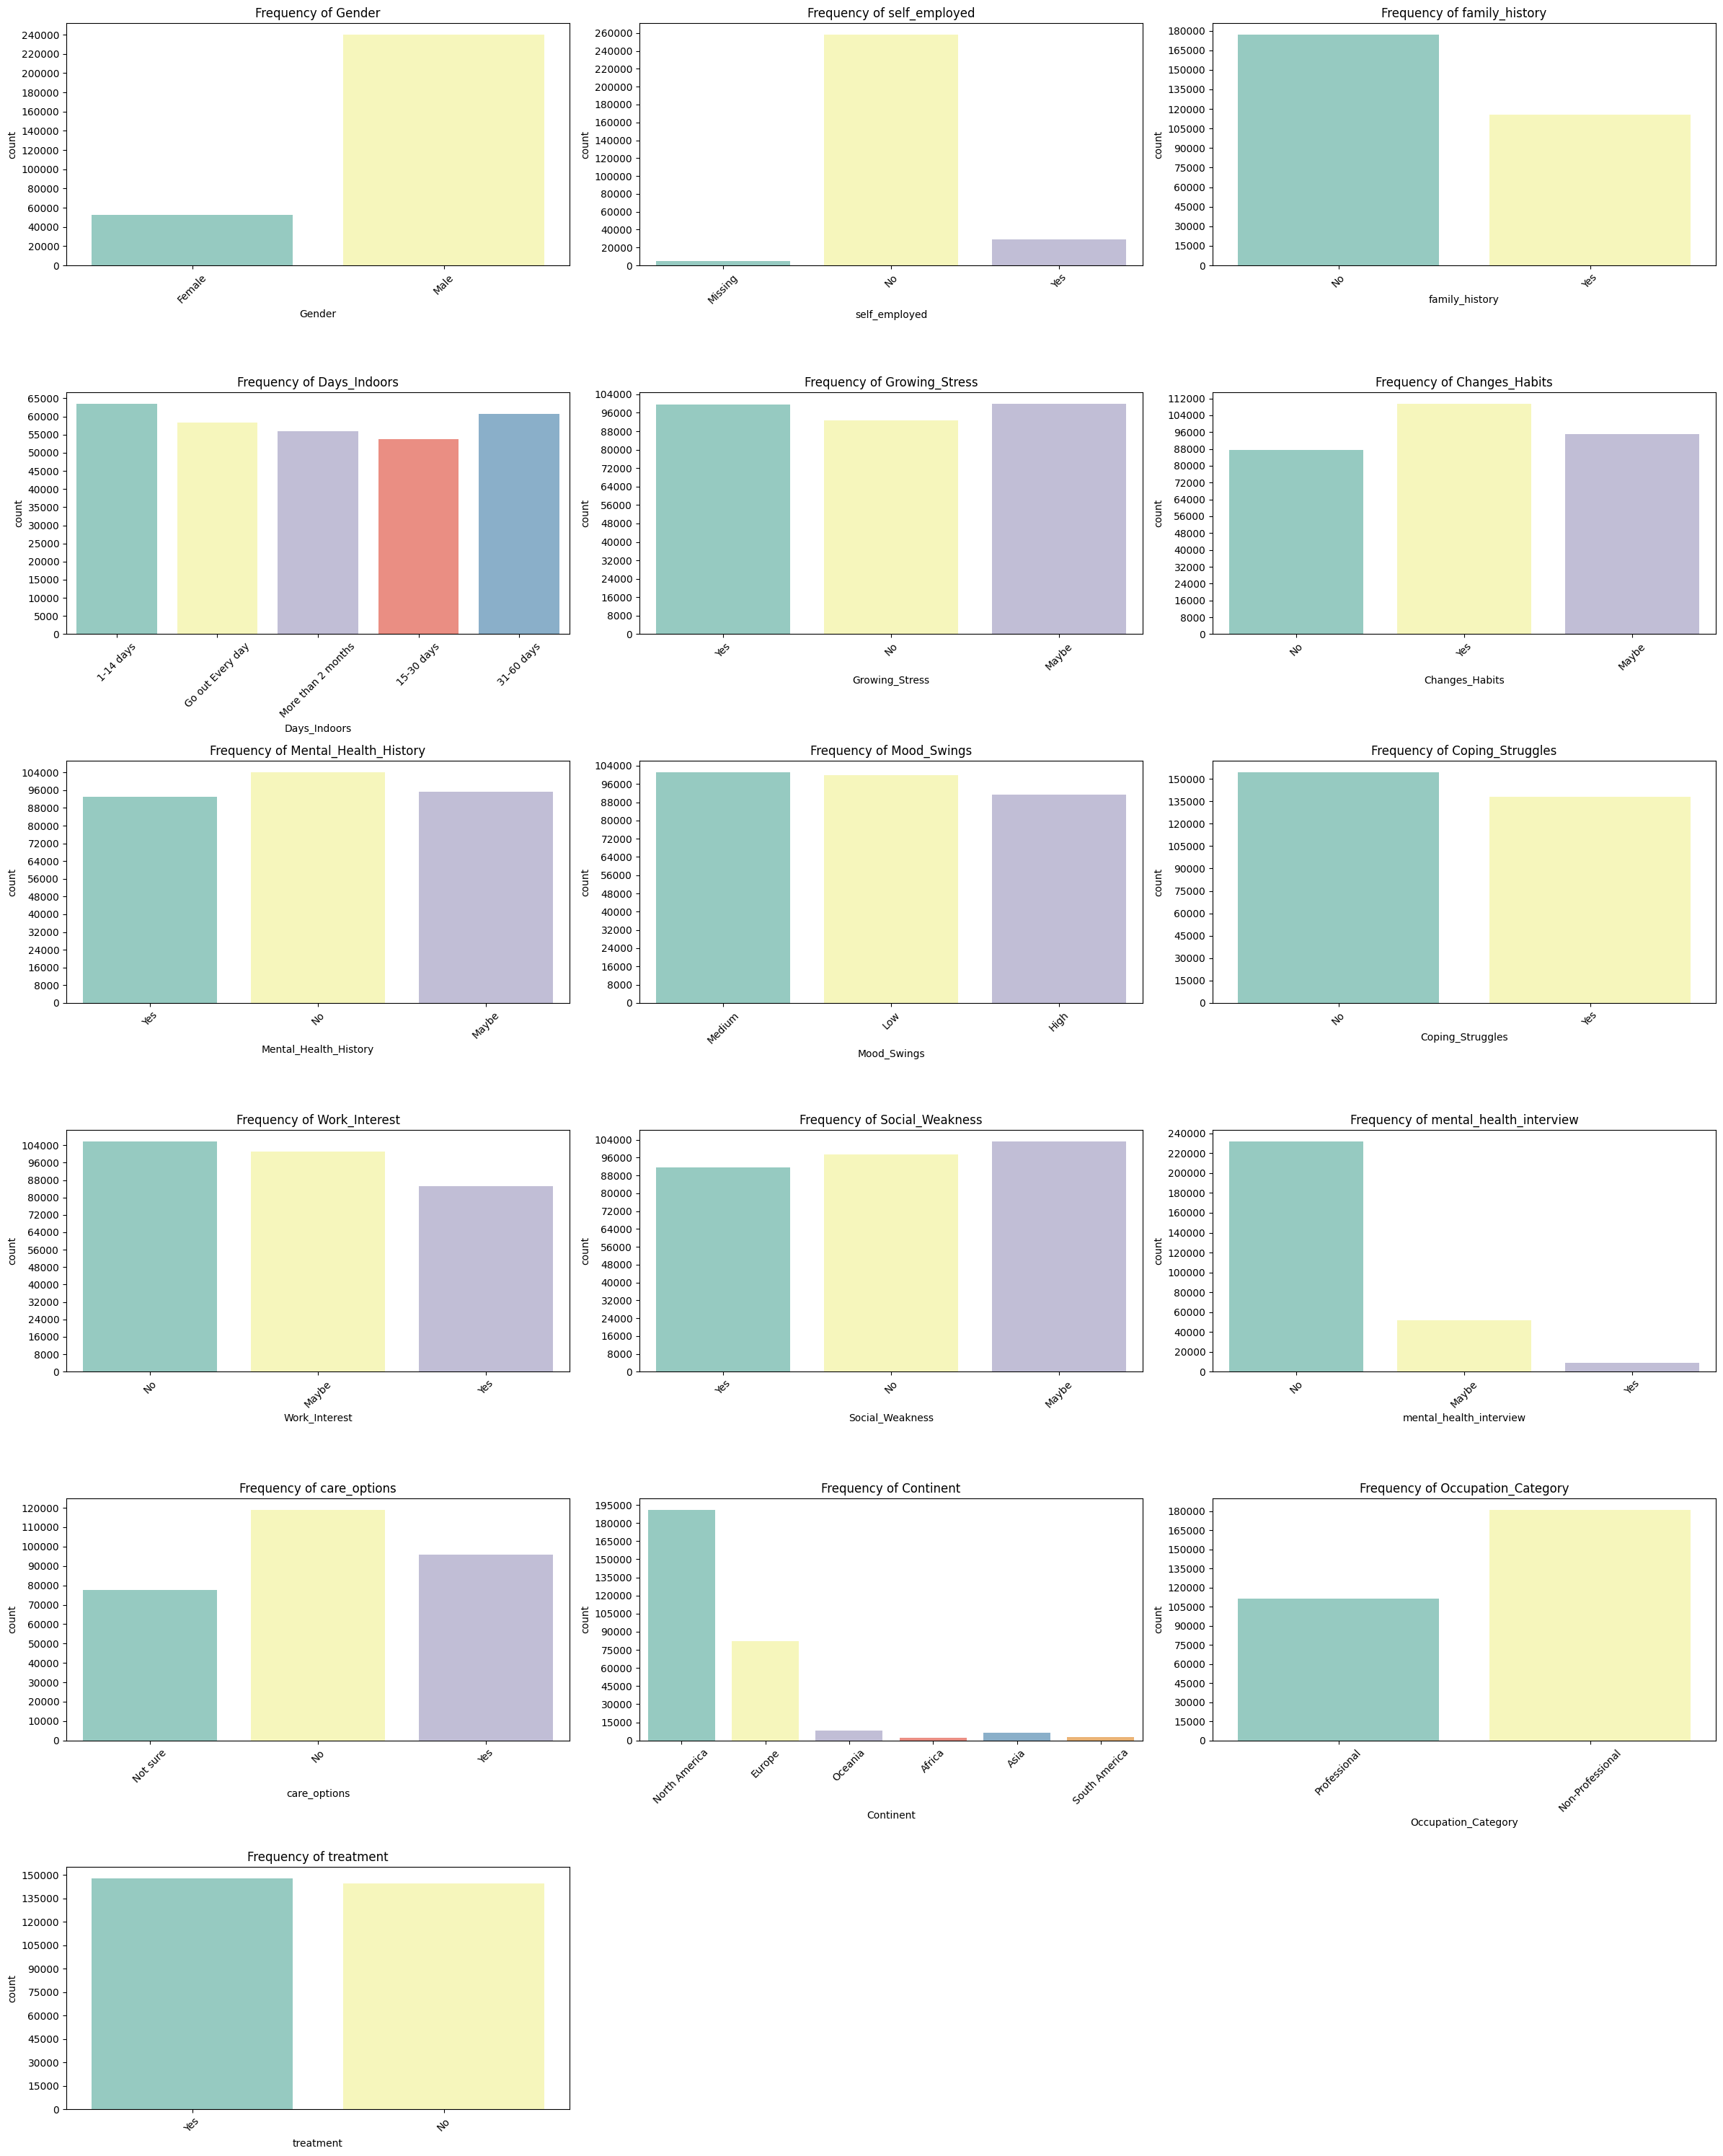

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# List of categorical features
cat_cols = ["Gender","self_employed", "family_history",
    "Days_Indoors", "Growing_Stress", "Changes_Habits", "Mental_Health_History",
    "Mood_Swings", "Coping_Struggles", "Work_Interest", "Social_Weakness",
    "mental_health_interview", "care_options", "Continent","Occupation_Category","treatment"]

plt.figure(figsize=(24, 30))

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(6, 3, i)
    plt.subplots_adjust(hspace=0.6)
    sns.countplot(data=df_univ, x=col, ax=ax, palette="Set3")
    ax.set_title(f'Frequency of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=15))

plt.tight_layout()
plt.show()


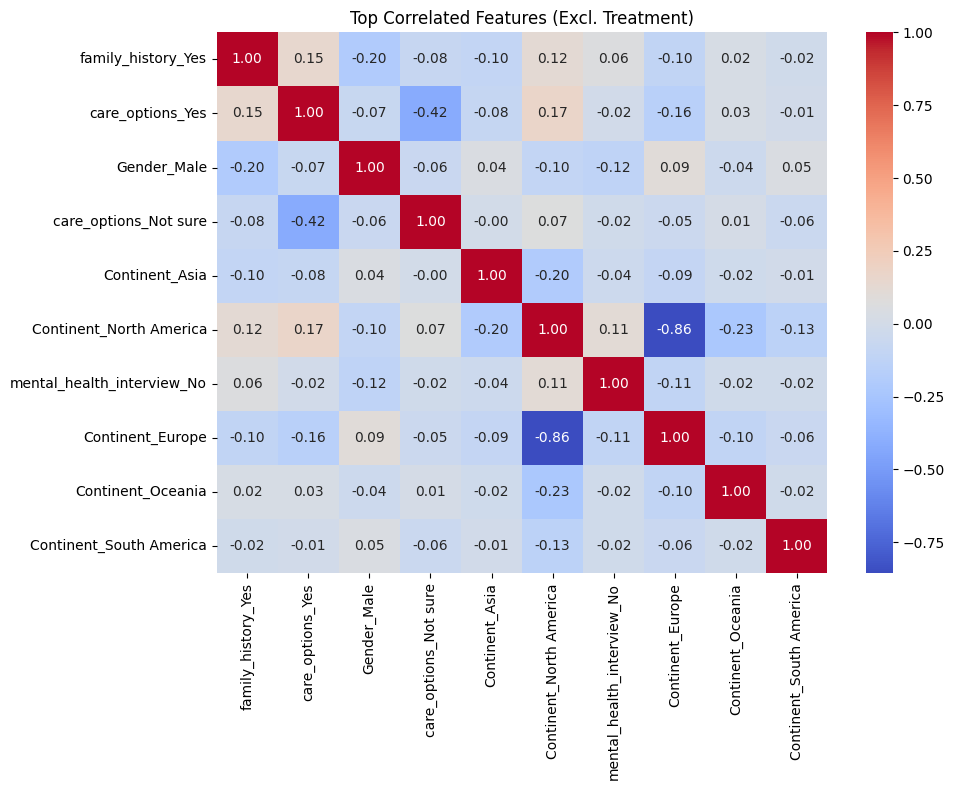

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Reset df_univ if needed (replace this with your actual data loading if necessary)
df_univ_copy = df_univ.copy()  # assuming df is your cleaned dataset

# Step 2: Manually encode 'treatment' as binary
df_univ['treatment'] = df_univ['treatment'].map({'Yes': 1, 'No': 0})

# Step 3: One-hot encode remaining categorical variables
df_encoded = pd.get_dummies(df_univ, drop_first=True)

# Step 4: Compute correlation matrix
corr_matrix = df_encoded.corr()

# Step 5: Get top 10 features most correlated with 'treatment'
top_corr_features = corr_matrix['treatment'].abs().sort_values(ascending=False)[1:11].index
top_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]

# Step 6: Plot heatmap of top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features (Excl. Treatment)")
plt.tight_layout()
plt.show()


In [1]:
df_univ  = df_univ_copy
df_univ.head()

NameError: name 'df_univ_copy' is not defined

treatment         No     Yes
Continent                   
Africa          1170    1214
Asia            5460     824
Europe         45724   36408
North America  87680  103134
Oceania         2774    5246
South America   1950     780


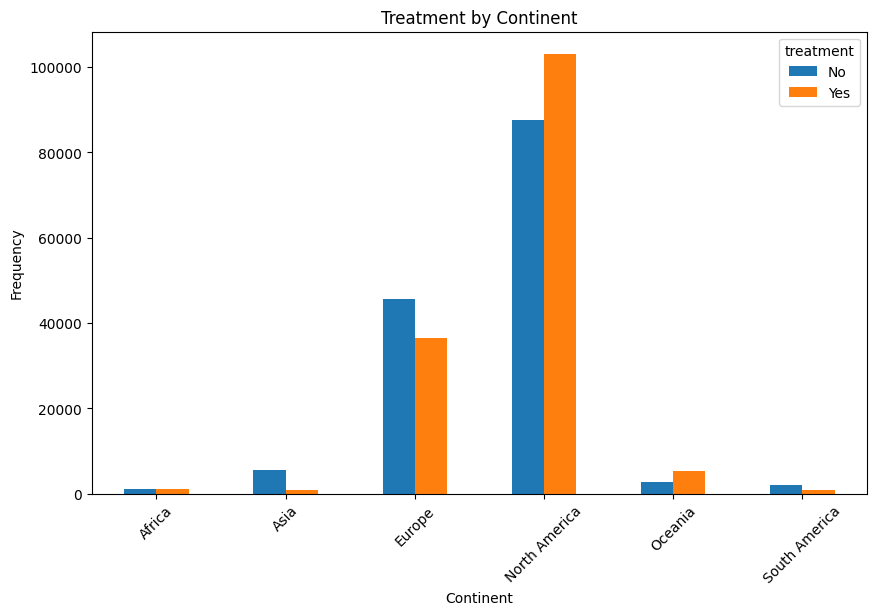

In [ ]:
import pandas as pd

# Replace 'df_univ' with your actual DataFrame
contingency = pd.crosstab(df_univ['Continent'], df_univ['treatment'])
print(contingency)

contingency.plot(kind = 'bar',figsize = (10,6))
plt.title('Treatment by Continent')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()



In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")
print("\nExpected Frequencies:\n", pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

Chi-Square Statistic: 6965.5999598889985
Degrees of Freedom: 5
P-value: 0.0

Expected Frequencies:
 treatment                No           Yes
Continent                                
Africa          1180.388393   1203.611607
Asia            3111.392894   3172.607106
Europe         40665.964537  41466.035463
North America  94477.613564  96336.386436
Oceania         3970.937462   4049.062538
South America   1351.703151   1378.296849


In [ ]:
import numpy as np

def cramers_v(chi2, n, dim):
    return np.sqrt(chi2 / (n * (min(dim) - 1)))

n = contingency.sum().sum()
cramers_v_val = cramers_v(chi2, n, contingency.shape)
print(f"Cramér's V: {cramers_v_val:.4f}")

Cramér's V: 0.1544


###Care options Bivariate Analysis

treatment        No    Yes
care_options              
No            70338  48548
Not sure      47158  30608
Yes           27262  68450


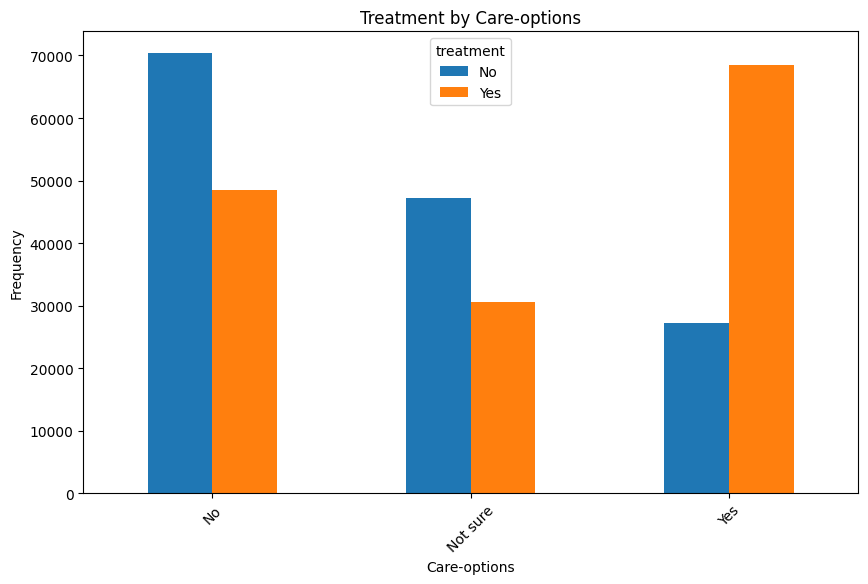

In [ ]:
import pandas as pd

# Replace 'df_univ' with your actual DataFrame
contingency= pd.crosstab(df_univ['care_options'], df_univ['treatment'])
print(contingency)

contingency.plot(kind = 'bar',figsize = (10,6))
plt.title('Treatment by Care-options')
plt.xlabel('Care-options')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")
print("\nExpected Frequencies:\n", pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

Chi-Square Statistic: 25215.104662912316
Degrees of Freedom: 2
P-value: 0.0

Expected Frequencies:
 treatment               No           Yes
care_options                            
No            58863.949009  60022.050991
Not sure      38504.229755  39261.770245
Yes           47389.821237  48322.178763


In [ ]:
import numpy as np

def cramers_v(chi2, n, dim):
    return np.sqrt(chi2 / (n * (min(dim) - 1)))

n = contingency.sum().sum()
cramers_v_val = cramers_v(chi2, n, contingency.shape)
print(f"Cramér's V: {cramers_v_val:.4f}")

Cramér's V: 0.2937


### Family History

treatment           No    Yes
family_history               
No              113766  63066
Yes              30992  84540


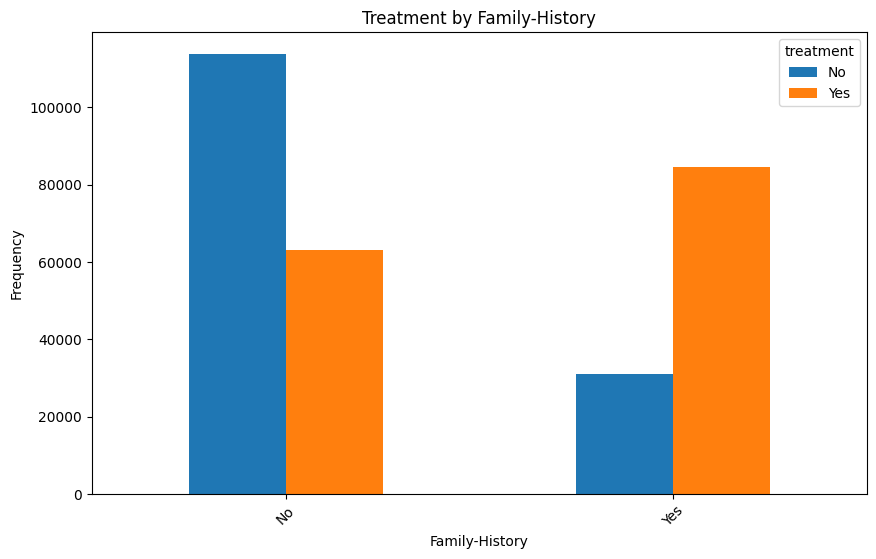

In [ ]:



contingency= pd.crosstab(df_univ['family_history'], df_univ['treatment'])
print(contingency)

contingency.plot(kind = 'bar',figsize = (10,6))
plt.title('Treatment by Family-History')
plt.xlabel('Family-History')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")
print("\nExpected Frequencies:\n", pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

Chi-Square Statistic: 39329.824625509915
Degrees of Freedom: 1
P-value: 0.0

Expected Frequencies:
 treatment                 No           Yes
family_history                            
No              87554.714862  89277.285138
Yes             57203.285138  58328.714862


In [ ]:
import numpy as np

def cramers_v(chi2, n, dim):
    return np.sqrt(chi2 / (n * (min(dim) - 1)))

n = contingency.sum().sum()
cramers_v_val = cramers_v(chi2, n, contingency.shape)
print(f"Cramér's V: {cramers_v_val:.4f}")

Cramér's V: 0.3668


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# List of categorical variables you want to check
cat_cols = ['Gender', 'Occupation_Category', 'self_employed', 'family_history',
            'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
            'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
            'mental_health_interview', 'care_options', 'Continent']

cramers_scores = {}

for col in cat_cols:
    confusion_mat = pd.crosstab(df_univ[col], df_univ['treatment'])
    score = cramers_v(confusion_mat)
    cramers_scores[col] = round(score, 4)

# Create a sorted DataFrame
cramers_df = pd.DataFrame.from_dict(cramers_scores, orient='index', columns=['Cramers_V'])
cramers_df = cramers_df.sort_values(by='Cramers_V', ascending=False)

print(cramers_df)

                         Cramers_V
family_history              0.3668
care_options                0.2937
Gender                      0.1772
Continent                   0.1544
mental_health_interview     0.0980
self_employed               0.0385
Growing_Stress              0.0104
Coping_Struggles            0.0100
Mental_Health_History       0.0068
Days_Indoors                0.0055
Occupation_Category         0.0048
Mood_Swings                 0.0042
Work_Interest               0.0039
Social_Weakness             0.0023
Changes_Habits              0.0022


In [23]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# List of categorical variables
cat_cols = ['Gender', 'Occupation_Category', 'self_employed', 'family_history',
            'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
            'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
            'mental_health_interview', 'care_options', 'Continent']

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Store results
results = {}

for col in cat_cols:
    contingency = pd.crosstab(df_univ[col], df_univ['treatment'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    c_v = cramers_v(contingency)

    results[col] = {
        'Chi2_Statistic': round(chi2, 4),
        'Degrees_of_Freedom': dof,
        'P_Value': round(p, 6),
        'Cramers_V': round(c_v, 4)
    }

# Convert to DataFrame
summary_df = pd.DataFrame.from_dict(results, orient='index')
summary_df = summary_df.sort_values(by='Chi2_Statistic', ascending=False)

# Display
print(summary_df)


                         Chi2_Statistic  Degrees_of_Freedom   P_Value  \
family_history               39329.8246                   1  0.000000   
care_options                 25215.1047                   2  0.000000   
Gender                        9179.5411                   1  0.000000   
Continent                     6965.6000                   5  0.000000   
mental_health_interview       2805.7970                   2  0.000000   
self_employed                  432.2649                   2  0.000000   
Growing_Stress                  31.7545                   2  0.000000   
Coping_Struggles                29.1113                   1  0.000000   
Mental_Health_History           13.5610                   2  0.001136   
Days_Indoors                     8.7947                   4  0.066442   
Occupation_Category              6.8652                   1  0.008789   
Mood_Swings                      5.2364                   2  0.072935   
Work_Interest                    4.5128            

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# List of categorical variables
cat_cols = ['Gender', 'Occupation_Category', 'self_employed', 'family_history',
            'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
            'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
            'mental_health_interview', 'care_options', 'Continent']

chisq_scores = {}

for col in cat_cols:
    # Generate the contingency table
    contingency_table = pd.crosstab(df_univ[col], df_univ['treatment'])

    # Run chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store chi-squared value
    chisq_scores[col] = round(chi2, 4)

# Convert to DataFrame
chisq_df = pd.DataFrame.from_dict(chisq_scores, orient='index', columns=['Chi_Square'])
chisq_df = chisq_df.sort_values(by='Chi_Square', ascending=False)

print(chisq_df)


                         Chi_Square
family_history           39329.8246
care_options             25215.1047
Gender                    9179.5411
Continent                 6965.6000
mental_health_interview   2805.7970
self_employed              432.2649
Growing_Stress              31.7545
Coping_Struggles            29.1113
Mental_Health_History       13.5610
Days_Indoors                 8.7947
Occupation_Category          6.8652
Mood_Swings                  5.2364
Work_Interest                4.5128
Social_Weakness              1.5815
Changes_Habits               1.4376


In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical variables
cat_cols = ['Gender', 'Occupation_Category', 'self_employed', 'family_history',
            'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
            'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
            'mental_health_interview', 'care_options', 'Continent']

# Loop through each feature and calculate Chi-Square stats
for col in cat_cols:
    print(f"\n=== Chi-Square Test for '{col}' ===")

    contingency = pd.crosstab(df_univ[col], df_univ['treatment'])

    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p:.4f}")

    print("\nExpected Frequencies:\n", pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))



=== Chi-Square Test for 'Gender' ===
Chi-Square Statistic: 9179.5411
Degrees of Freedom: 1
P-value: 0.0000

Expected Frequencies:
 treatment             No            Yes
Gender                                 
Female      26001.223174   26512.776826
Male       118756.776826  121093.223174

=== Chi-Square Test for 'Occupation_Category' ===
Chi-Square Statistic: 6.8652
Degrees of Freedom: 1
P-value: 0.0088

Expected Frequencies:
 treatment                      No           Yes
Occupation_Category                            
Non-Professional     89611.482221  91374.517779
Professional         55146.517779  56231.482221

=== Chi-Square Test for 'self_employed' ===
Chi-Square Statistic: 432.2649
Degrees of Freedom: 2
P-value: 0.0000

Expected Frequencies:
 treatment                 No            Yes
self_employed                              
Missing          2575.662927    2626.337073
No             127740.403921  130253.596079
Yes             14441.933152   14726.066848

=== Chi-Square 

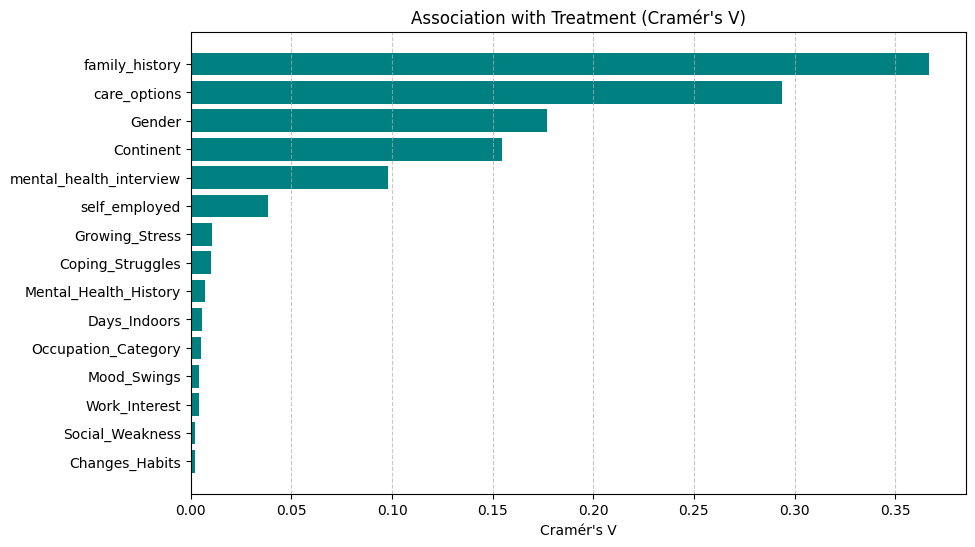

In [88]:
import matplotlib.pyplot as plt

# Sort values and plot
cramers_df = pd.DataFrame({
    'Variable': list(cramers_scores.keys()),
    'Cramers_V': list(cramers_scores.values())
}).sort_values(by='Cramers_V', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(cramers_df['Variable'], cramers_df['Cramers_V'], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Cramér's V")
plt.title("Association with Treatment (Cramér's V)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### From this we can see that family_history , care_options , Gender, Continent, mental_health_interview and self_employed have the highest relation with treatment .

In [25]:
df_multi = df_univ.copy()
df_multi['treatment'] = df_multi['treatment'].map({'Yes': 1, 'No': 0})

In [93]:
from sklearn.feature_selection import mutual_info_classif

X = df_multi[['Growing_Stress', 'Coping_Struggles', 'Mental_Health_History','Days_Indoors','Occupation_Category','Mood_Swings','Work_Interest','Social_Weakness','Changes_Habits']].copy()
X = X.fillna('Missing')  # Handle missing if any
X_encoded = pd.get_dummies(X, drop_first=True)  # Encode categorical

y = df_multi['treatment'].astype(int)

mi_scores = mutual_info_classif(X_encoded, y)
mi_results = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_results)


Mutual Information Scores:
 Coping_Struggles_Yes                0.022301
Occupation_Category_Professional    0.015895
Changes_Habits_Yes                  0.013219
Work_Interest_No                    0.012802
Mental_Health_History_No            0.011890
Social_Weakness_No                  0.011437
Growing_Stress_Yes                  0.011357
Mood_Swings_Low                     0.011026
Social_Weakness_Yes                 0.010799
Mood_Swings_Medium                  0.010255
Growing_Stress_No                   0.010057
Changes_Habits_No                   0.008308
Mental_Health_History_Yes           0.007488
Work_Interest_Yes                   0.006614
Days_Indoors_31-60 days             0.004614
Days_Indoors_More than 2 months     0.003798
Days_Indoors_Go out Every day       0.002906
Days_Indoors_15-30 days             0.001513
dtype: float64


In [95]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Select original features
X = df_multi[['Growing_Stress', 'Coping_Struggles', 'Mental_Health_History','Days_Indoors','Occupation_Category','Mood_Swings','Work_Interest','Social_Weakness','Changes_Habits']].copy()
X = X.fillna('Missing')

# Label Encode each column (preserves feature as one unit)
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

y = df_multi['treatment'].astype(int)

# Compute MI for each entire feature
mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Mutual Information (per feature):\n", mi_results)


Mutual Information (per feature):
 Growing_Stress           0.000054
Coping_Struggles         0.000050
Mental_Health_History    0.000023
Days_Indoors             0.000015
Occupation_Category      0.000012
Mood_Swings              0.000009
Work_Interest            0.000008
Social_Weakness          0.000003
Changes_Habits           0.000002
dtype: float64


In [39]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Split
X = df_multi.drop(columns=['treatment'])
y = df_multi['treatment'].astype(int)

# 2. Identify categorical features
cat_features = X.select_dtypes(include='object').columns.tolist()

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. Define model
model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    eval_metric='F1',
    cat_features=cat_features,
    class_weights=[1, 2],  # Increase weight for class 1 (treatment)
    verbose=100,
    random_seed=42
)

# 5. Fit model
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# 6. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


0:	learn: 0.8034708	test: 0.8000406	best: 0.8000406 (0)	total: 434ms	remaining: 7m 13s
100:	learn: 0.8350371	test: 0.8329884	best: 0.8329884 (80)	total: 42.2s	remaining: 6m 15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8329883669
bestIteration = 80

Shrink model to first 81 iterations.
              precision    recall  f1-score   support

           0       0.80      0.65      0.72     28952
           1       0.71      0.83      0.77     29521

    accuracy                           0.75     58473
   macro avg       0.75      0.74      0.74     58473
weighted avg       0.75      0.75      0.74     58473



/tmp/ipython-input-31-957383221.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')


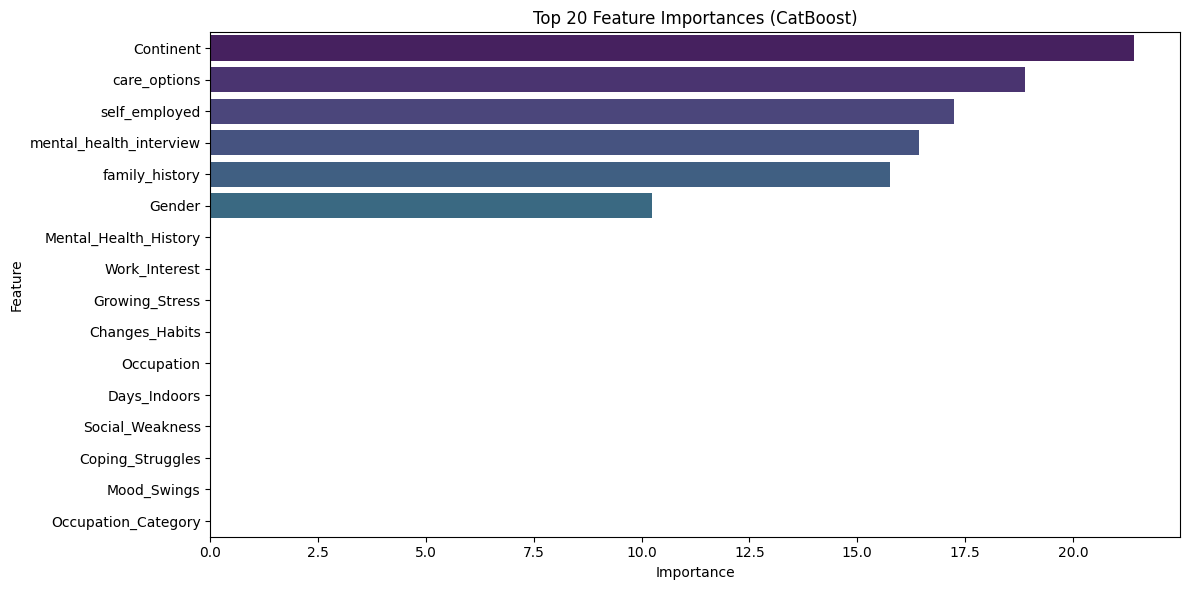

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances (CatBoost)")
plt.tight_layout()
plt.show()


In [44]:
# 1. Split
X2 = df_multi.drop(columns=['treatment','Changes_Habits','Social_Weakness','Work_Interest','Mood_Swings','Growing_Stress','Coping_Struggles','Days_Indoors'])
y2 = df_multi['treatment'].astype(int)

# 2. Identify categorical features
cat_features2 = X2.select_dtypes(include='object').columns.tolist()

# 3. Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. Define model
model2= CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    eval_metric='F1',
    cat_features=cat_features,
    class_weights=[1, 2],  # Increase weight for class 1 (treatment)
    verbose=100,
    random_seed=42
)

# 5. Fit model
model2.fit(X_train2, y_train2, eval_set=(X_test2, y_test2), early_stopping_rounds=50)

# 6. Evaluate
y_pred2 = model2.predict(X_test2)
print(classification_report(y_test2, y_pred2))

0:	learn: 0.8034708	test: 0.8000406	best: 0.8000406 (0)	total: 633ms	remaining: 10m 31s
100:	learn: 0.8350371	test: 0.8329884	best: 0.8329884 (80)	total: 39.2s	remaining: 5m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8329883669
bestIteration = 80

Shrink model to first 81 iterations.
              precision    recall  f1-score   support

           0       0.80      0.65      0.72     28952
           1       0.71      0.83      0.77     29521

    accuracy                           0.75     58473
   macro avg       0.75      0.74      0.74     58473
weighted avg       0.75      0.75      0.74     58473



In [26]:
X2 = df_multi.drop(columns=['treatment','Changes_Habits','Social_Weakness','Work_Interest','Mood_Swings','Growing_Stress','Coping_Struggles','Days_Indoors'])

In [27]:
X2.head()

,Gender,self_employed,family_history,Mental_Health_History,mental_health_interview,care_options,Continent,Occupation_Category
0,Female,Missing,No,Yes,No,Not sure,North America,Professional
1,Female,Missing,Yes,Yes,No,No,North America,Professional
2,Female,Missing,Yes,Yes,No,Yes,North America,Professional
3,Female,No,Yes,Yes,Maybe,Yes,North America,Professional
4,Female,No,Yes,Yes,No,Yes,North America,Professional


In [43]:
df_multi.drop(columns = ['Occupation'],axis = 1)

,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Continent,Occupation_Category
0,Female,Missing,No,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,North America,Professional
1,Female,Missing,Yes,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,North America,Professional
2,Female,Missing,Yes,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,North America,Professional
3,Female,No,Yes,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,North America,Professional
4,Female,No,Yes,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,North America,Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,Yes,Yes,1,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure,North America,Professional
292360,Male,No,Yes,1,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes,Africa,Professional
292361,Male,No,Yes,0,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No,North America,Professional
292362,Male,No,Yes,1,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes,North America,Professional


/tmp/ipython-input-41-1271769398.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df2.head(20), x='Importance', y='Feature', palette='viridis')


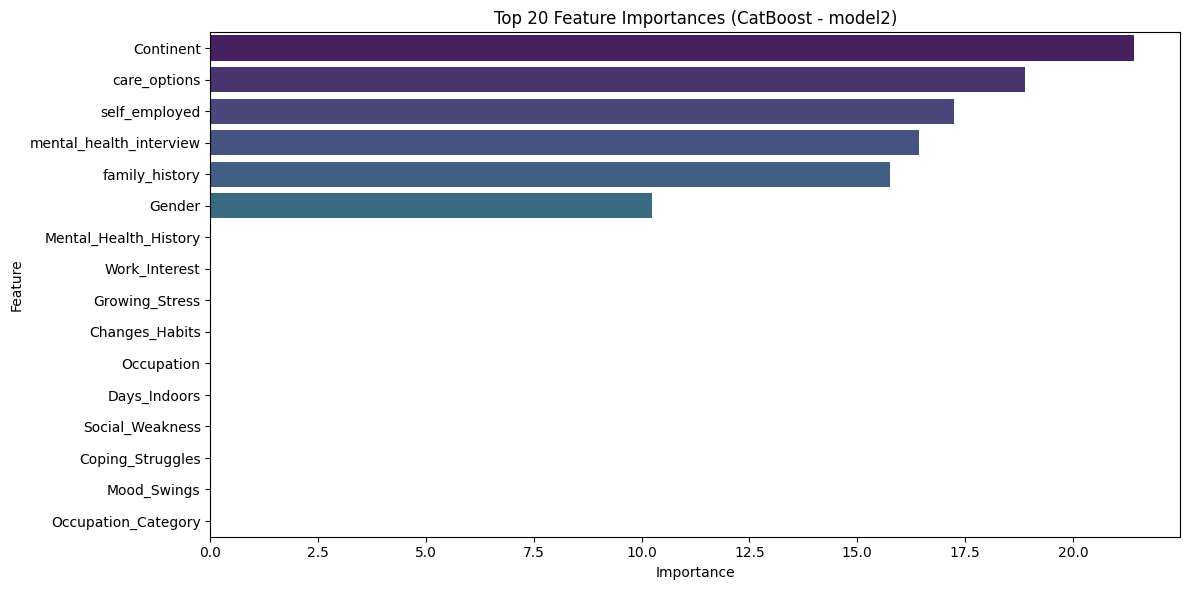

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from model2
importances2 = model2.get_feature_importance()
feature_names2 = X_train2.columns

# Create a DataFrame for feature importances
feat_imp_df2 = pd.DataFrame({
    'Feature': feature_names2,
    'Importance': importances2
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 6))
sns.barplot(data=feat_imp_df2.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances (CatBoost - model2)")
plt.tight_layout()
plt.show()

In [45]:
model2.save_model("Mental_Health_Prediction_model.cbm")

In [46]:
from google.colab import files

files.download("Mental_Health_Prediction_model.cbm")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [48]:
!cp Mental_Health_Prediction_model.cbm /content/drive/MyDrive/


In [57]:
df_univ = df_univ.drop(columns=['Occupation'])

In [58]:
df_univ.head()

,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Continent,Occupation_Category
0,Female,Missing,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,North America,Professional
1,Female,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,North America,Professional
2,Female,Missing,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,North America,Professional
3,Female,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,North America,Professional
4,Female,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,North America,Professional


In [59]:
df_univ.to_csv('cleaned_dataset.csv', index=False)

In [60]:
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>